In [ ]:
# Start writing code here...

In [ ]:
#!mlflow ui -p 5555

In [ ]:
# from IPython.display import IFrame
# IFrame("http://127.0.0.1:5555", 900,500)

In [ ]:
!pip install pycaret[full] 
#Restart kernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 KB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 KB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 78.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 KB 25.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.6/458.6 KB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 81.0 MB/s eta 0:00:00
  Preparing meta

In [ ]:
$pip install arize
$pip install mlflow

In [ ]:
import sys
sys.path.append('..')

import os
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
from  sklearn.svm import SVR

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.utils.validation import check_is_fitted
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion

from sklearn import set_config
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer, MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression



from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV

import xgboost
from xgboost import XGBRegressor

from lib.viz import draw_histogram, create_silhoutte_cluster_viz
from lib.unsupervised import kmeans_parameters_search

from lib.supervised_tuning import FeatureTTRegressor, final_comparison, add_cluster_label, print_scores, predict_score_base_regressors, predict_mean_squared_error_regression

from matplotlib import pyplot as plt
from xgboost import plot_importance

%matplotlib inline


/shared-libs/python3.9/py/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [ ]:
RANDOM_SEED = 42

## Load numpy arrays and dataframes from pickle files

In [ ]:
with open('train_test_dict_standardscaler.pickle', 'rb') as file:
        train_test_dict = pickle.load( file)
X_train_impute = train_test_dict['X_train_impute']
X_test_impute = train_test_dict['X_test_impute']
y_train = train_test_dict['y_train']
y_test = train_test_dict['y_test']

with open('X_train_impute_standardscaler_df.pkl', 'rb') as file:
        X_train_impute_df = pickle.load( file)
with open('X_test_impute_standardscaler_df.pkl', 'rb') as file:
        X_test_impute_df = pickle.load( file)


## [Understand the distribution of the target](https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html)

In [ ]:
draw_histogram(pd.DataFrame(y_train.reset_index()), "GSE_GWE" ) 

alt.LayerChart(...)

## [Normalize the target to improve accuracy](https://anshikaaxena.medium.com/how-skewed-data-can-skrew-your-linear-regression-model-accuracy-and-transfromation-can-help-62c6d3fe4c53)




In [ ]:
#We will view the variables with sqrt applied but we do not need these in the model since 
# we will be using TransformedTargetRegressor to wrap models to aid with Cross Validations
y_train_sqrt = np.sqrt(train_test_dict['y_train'])
y_test_sqrt = np.sqrt(train_test_dict['y_test'])
draw_histogram(pd.DataFrame(y_train_sqrt.reset_index()), "GSE_GWE" ) 

alt.LayerChart(...)

#### Crop Code to Crop Name mapping

[Crop to Code mapping](https://github.com/mlnrt/milestone2_waterwells_data/blob/main/crops/crop_name_to_type_mapping.json)

### PyCaret Experimentations

Pycaret Full overrides the currently set libraries in the Docker container.
If placed in the reuirements.txt file, the project takes very long to start up and so this library is only installed for this notebook for all the experimentations.

1. Start the machine/project
2. Run pip install for pycaret[full]   [This can take anywhere from 10 mins to 20 mins)
3. Once the library is installed, restart the kernel for the notebook.
4. Run the cells above once again.

In [ ]:
#This might need restart of the kernel
from pycaret.regression import *

In [ ]:
train_data = pd.concat([X_train_impute_df, y_train], axis=1)
test_data = pd.concat([X_test_impute_df, y_test], axis=1)


array([[<AxesSubplot:title={'center':'TOTALDRILLDEPTH_AVG'}>,
        <AxesSubplot:title={'center':'WELLYIELD_AVG'}>,
        <AxesSubplot:title={'center':'STATICWATERLEVEL_AVG'}>,
        <AxesSubplot:title={'center':'TOPOFPERFORATEDINTERVAL_AVG'}>,
        <AxesSubplot:title={'center':'BOTTOMOFPERFORATEDINTERVAL_AVG'}>,
        <AxesSubplot:title={'center':'TOTALCOMPLETEDDEPTH_AVG'}>,
        <AxesSubplot:title={'center':'VEGETATION_BLUE_OAK-GRAY_PINE'}>,
        <AxesSubplot:title={'center':'VEGETATION_CALIFORNIA_COAST_LIVE_OAK'}>,
        <AxesSubplot:title={'center':'VEGETATION_CANYON_LIVE_OAK'}>],
       [<AxesSubplot:title={'center':'VEGETATION_HARD_CHAPARRAL'}>,
        <AxesSubplot:title={'center':'VEGETATION_KNOBCONE_PINE'}>,
        <AxesSubplot:title={'center':'VEGETATION_NON-NATIVE_HARDWOOD_FOREST'}>,
        <AxesSubplot:title={'center':'VEGETATION_PINYON-JUNIPER'}>,
        <AxesSubplot:title={'center':'SOIL_ALFISOLS_B'}>,
        <AxesSubplot:title={'center':'SOIL_ALFIS

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


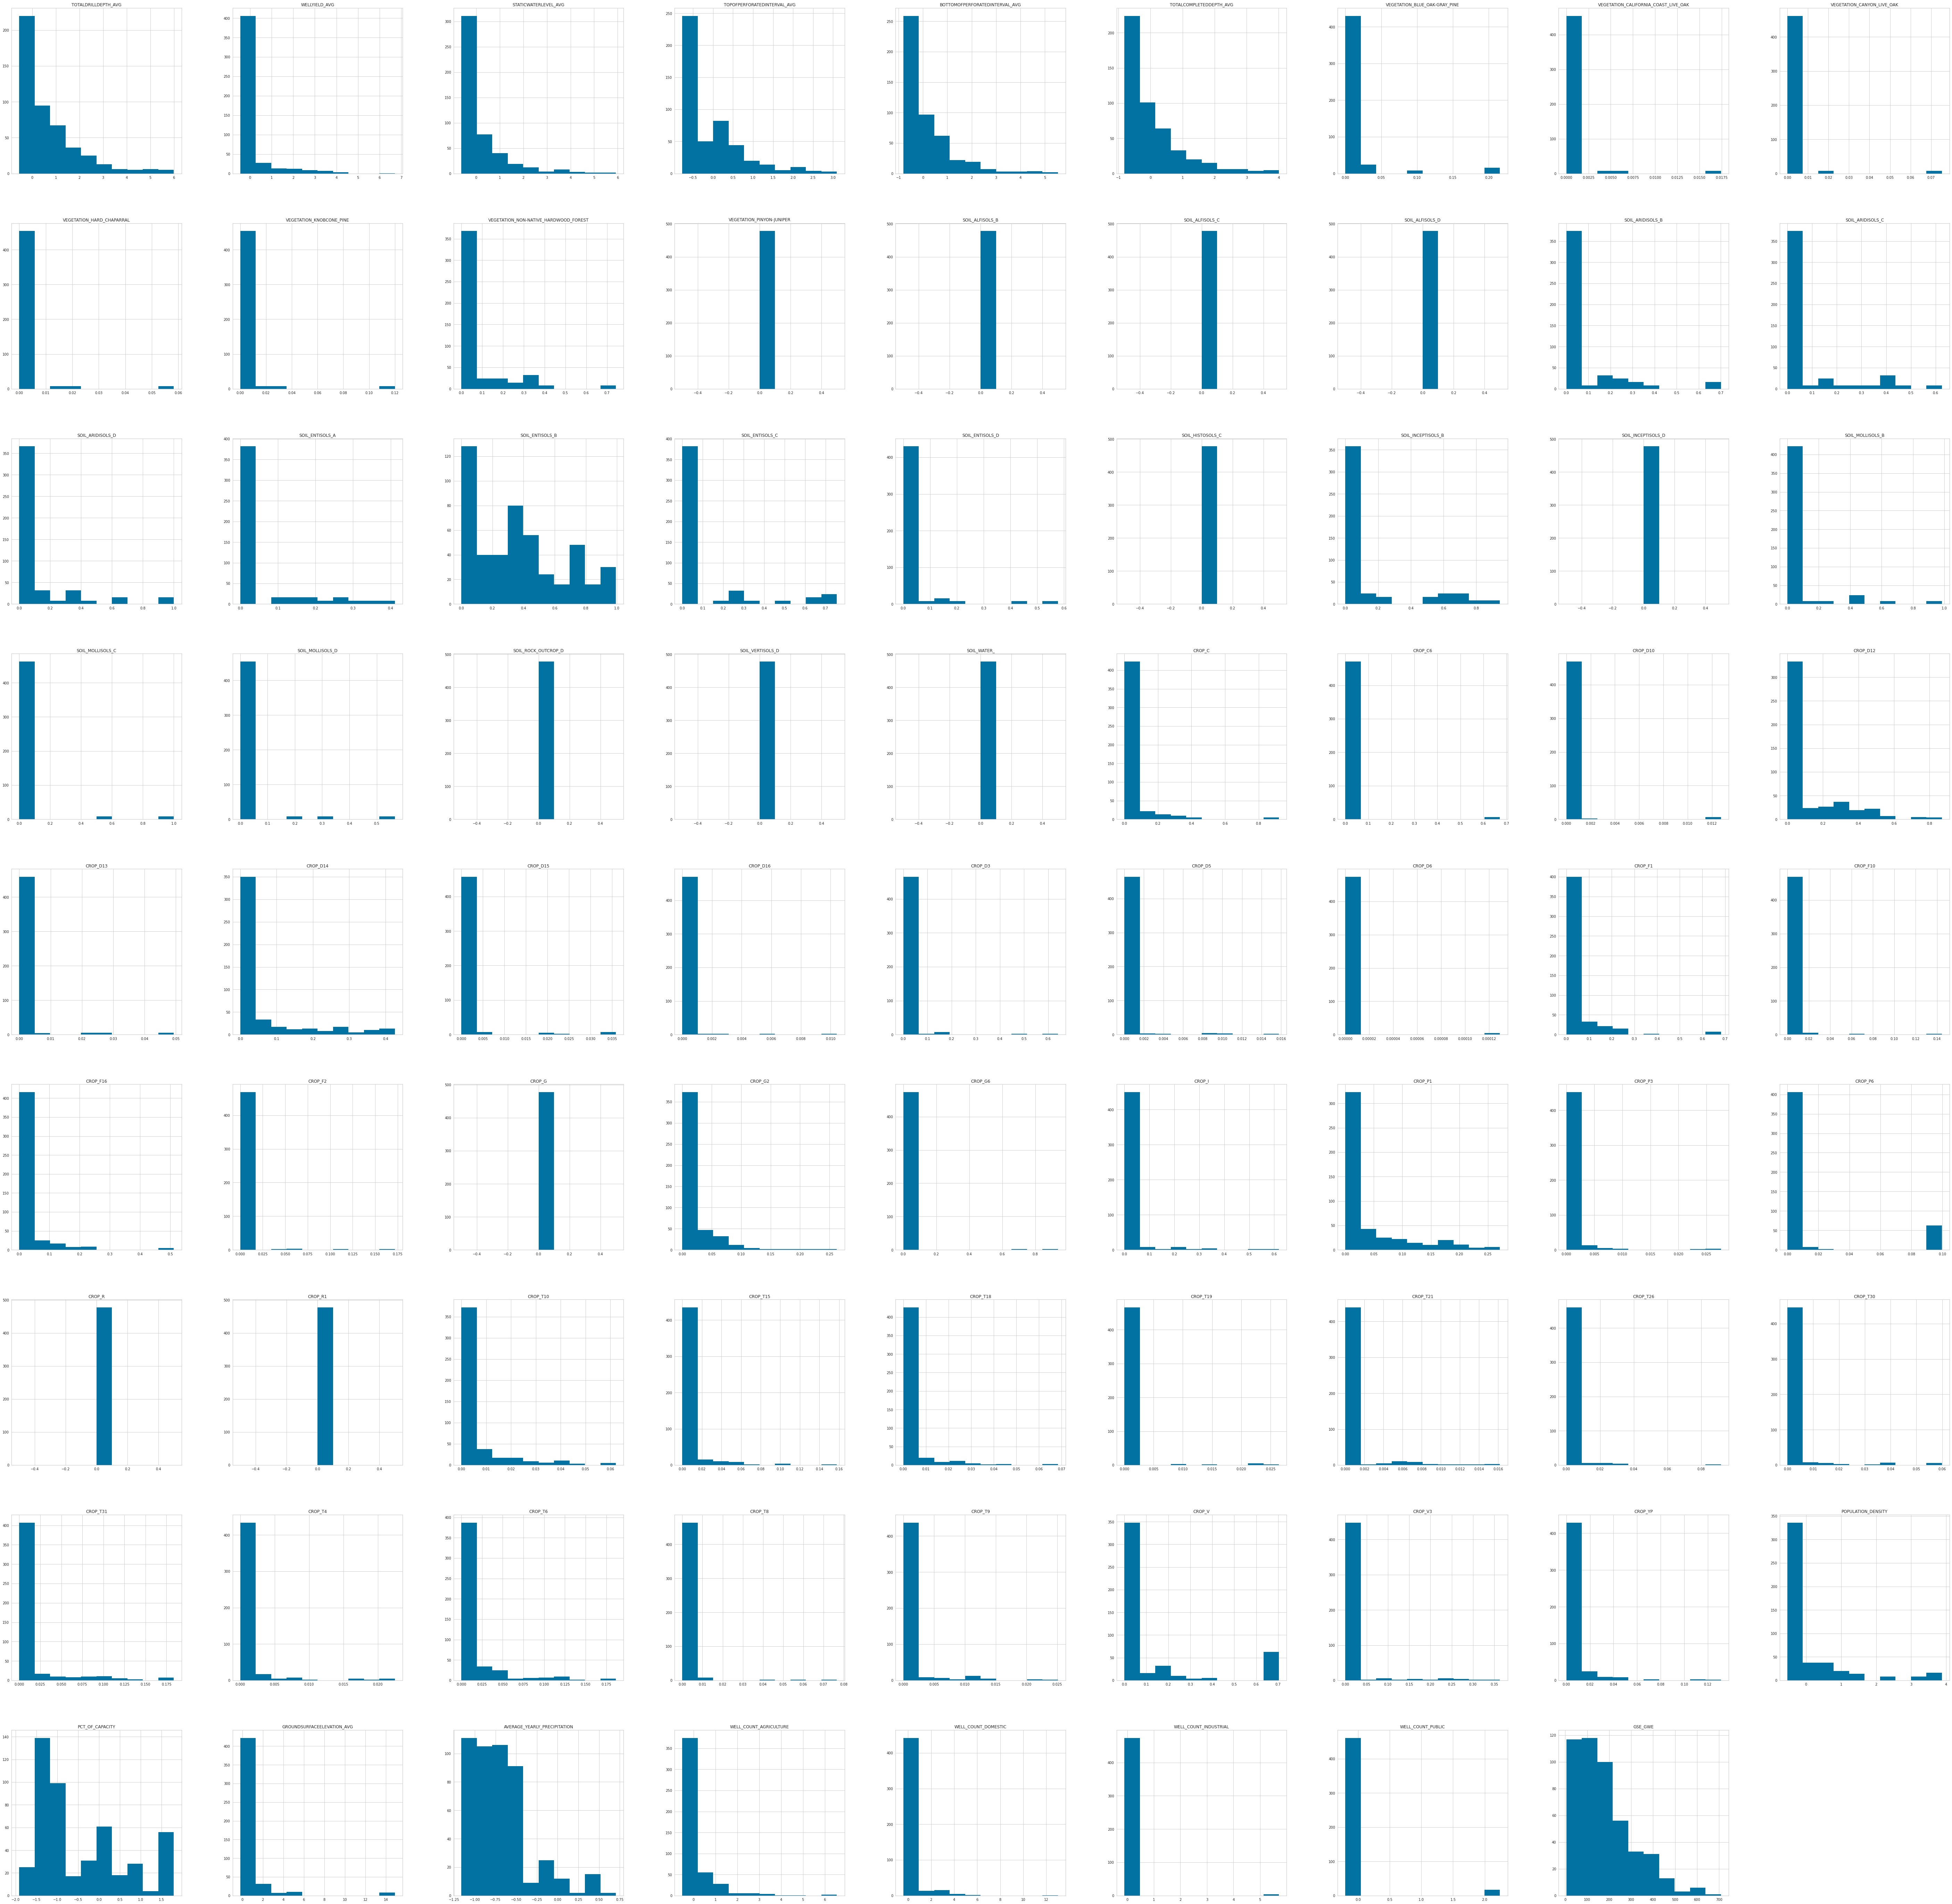

In [ ]:
test_data.hist(figsize=(100,100))

#### PyCaret experiments with PCA, target transformations, low variance

### Use PCA components to train

These are the components that StandardScaling creates which explain 70% of the variance in the data. 

- Component 0 (well_water_depth): ['TOTALCOMPLETEDDEPTH_AVG', 'BOTTOMOFPERFORATEDINTERVAL_AVG', 'TOPOFPERFORATEDINTERVAL_AVG', 'STATICWATERLEVEL_AVG']
- Component 1(well_usage_population): ['WELL_COUNT_DOMESTIC', 'WELL_COUNT_PUBLIC', 'WELL_COUNT_AGRICULTURE', - 'POPULATION_DENSITY'] 
- Component 2(precipitation_collection_elevation): ['PCT_OF_CAPACITY', 'AVERAGE_YEARLY_PRECIPITATION', 'GROUNDSURFACEELEVATION_AVG', 'WELL_COUNT_AGRICULTURE'] 
- Component 3(elevation_industrial_usage_population): ['GROUNDSURFACEELEVATION_AVG', 'WELL_COUNT_INDUSTRIAL', 'AVERAGE_YEARLY_PRECIPITATION', 'POPULATION_DENSITY'] 
- Component 4 (elevation_agricultural_usage_population): ['WELL_COUNT_INDUSTRIAL', 'AVERAGE_YEARLY_PRECIPITATION', 'POPULATION_DENSITY', 'WELL_COUNT_AGRICULTURE'] 
- Component 5(populattion_elevation_well_feature_agriculture): ['POPULATION_DENSITY', 'GROUNDSURFACEELEVATION_AVG', 'TOTALDRILLDEPTH_AVG', 'WELL_COUNT_AGRICULTURE'] 
- Component 6(well_details_elevation): ['TOTALDRILLDEPTH_AVG', 'WELLYIELD_AVG', 'STATICWATERLEVEL_AVG', 'GROUNDSURFACEELEVATION_AVG'] 

In [ ]:
with open("X_pca_standardscaler.pickle", "rb") as file:
    pca_train_test_dict = pickle.load(file)
X_train_standardscaler_pca = pca_train_test_dict["X_train_pca"]
X_test_standardscaler_pca = pca_train_test_dict["X_test_pca"]

arr_train_y = y_train.values.reshape(y_train.values.shape[0], 1)
arr_test_y = y_test.values.reshape(y_test.values.shape[0], 1)

pca_train_standardscaler_df = pd.DataFrame(
    np.hstack((X_train_standardscaler_pca, arr_train_y)),
    columns=[
        "Component_0",
        "Component_1",
        "Component_2",
        "Component_3",
        "Component_4",
        "Component_5",
        "Component_6",
        "GSE_GWE",
    ],
)
pca_test_standardscaler_df = pd.DataFrame(
    np.hstack((X_test_standardscaler_pca, arr_test_y)),
    columns=[
        "Component_0",
        "Component_1",
        "Component_2",
        "Component_3",
        "Component_4",
        "Component_5",
        "Component_6",
        "GSE_GWE",
    ],
)


In [ ]:
target_normalized_exp = setup(
    pca_train_standardscaler_df,
    target="GSE_GWE",
    preprocess=False,
    #Transform the target
    transform_target= True,
    train_size=1.0,
    test_data=pca_test_standardscaler_df,
    session_id=RANDOM_SEED,
    log_experiment=True,
    pca=True,
    pca_components=7,
    pca_method="linear",
    experiment_name="water_depth_pca_standardscaler"
)

,Description,Value
0,session_id,42
1,Target,GSE_GWE
2,Original Data,"(3346, 8)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,0
6,Transformed Train Set,"(3346, 7)"
7,Transformed Test Set,"(478, 7)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,False


2022/07/04 14:36:42 INFO mlflow.tracking.fluent: Experiment with name 'water_depth_pca_standardscaler' does not exist. Creating a new experiment.


In [ ]:
pca_standardscaler_best = compare_models(['et', 'rf'],fold=15)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,69.2732,10285.1542,96.8231,0.0826,0.7236,1.0042,1.4900
rf,Random Forest Regressor,71.3887,10794.3259,99.1640,0.0427,0.7381,1.0443,2.0933


In [ ]:
with open("X_pca_minmax.pickle", "rb") as file:
    pca_train_test_dict = pickle.load(file)
X_train_minmax_pca = pca_train_test_dict["X_train_pca"]
X_test_minmax_pca = pca_train_test_dict["X_test_pca"]

arr_train_y = y_train.values.reshape(y_train.values.shape[0], 1)
arr_test_y = y_test.values.reshape(y_test.values.shape[0], 1)

pca_train_minmax_df = pd.DataFrame(
    np.hstack((X_train_minmax_pca, arr_train_y)),
    columns=[
        "Component_0",
        "Component_1",
        "Component_2",
        "Component_3",
        "Component_4",
        "Component_5",
        "Component_6",
        "Component_7",
        "Component_8",
        "Component_9",
        "Component_10",
        "Component_11",
        "GSE_GWE",
    ],
)
pca_test_minmax_df = pd.DataFrame(
    np.hstack((X_test_minmax_pca, arr_test_y)),
    columns=[
        "Component_0",
        "Component_1",
        "Component_2",
        "Component_3",
        "Component_4",
        "Component_5",
        "Component_6",
        "Component_7",
        "Component_8",
        "Component_9",
        "Component_10",
        "Component_11",
        "GSE_GWE",
    ],
)


In [ ]:
target_normalized_exp = setup(
    pca_train_minmax_df,
    target="GSE_GWE",
    preprocess=False,
    #Transform the target
    transform_target= True,
    train_size=1.0,
    test_data=pca_test_minmax_df,
    session_id=RANDOM_SEED,
    log_experiment=True,
    pca=True,
    pca_components=7,
    pca_method="linear",
    experiment_name="water_depth_pca_minmax"
)

,Description,Value
0,session_id,42
1,Target,GSE_GWE
2,Original Data,"(3346, 13)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,0
6,Transformed Train Set,"(3346, 12)"
7,Transformed Test Set,"(478, 12)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,False


2022/07/04 14:41:29 INFO mlflow.tracking.fluent: Experiment with name 'water_depth_pca_minmax' does not exist. Creating a new experiment.


In [ ]:
pca_minmax_best = compare_models(['et', 'rf'])


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,81.1472,13822.1424,109.1983,-0.1457,0.8341,1.3663,1.2900
rf,Random Forest Regressor,84.0826,14668.2850,112.6982,-0.1779,0.8457,1.4404,3.0290


#### Run PyCaret experiment  by ignoring low variance and remove multi-collinearity

In [ ]:
from pycaret.regression import *

# We already have an imputed and scaled train and test, we do not want to preprocess

target_normalized_exp = setup(
    train_data,
    target="GSE_GWE",
    preprocess=False,
    #Transform the target
    transform_target= True,
    remove_multicollinearity = True,
    multicollinearity_threshold=0.1,
    #Low Variance in feature
    ignore_low_variance=True,
    train_size=1.0,
    test_data=test_data,
    session_id=RANDOM_SEED,
    log_experiment=True,
    experiment_name="water_depth_1",
)

,Description,Value
0,session_id,42
1,Target,GSE_GWE
2,Original Data,"(3346, 80)"
3,Missing Values,False
4,Numeric Features,79
5,Categorical Features,0
6,Transformed Train Set,"(3346, 79)"
7,Transformed Test Set,"(478, 79)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,False


In [ ]:
pick_best_model = compare_models(['et', 'lightgbm', 'rf', 'knn', 'xgboost', 'gbr', 'svm'], fold=51)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,49.8439,6499.0555,68.1167,0.4340,0.5374,0.6717,3.7476
lightgbm,Light Gradient Boosting Machine,51.8857,6934.4174,71.5961,0.3372,0.5580,0.7313,0.5347
rf,Random Forest Regressor,54.5155,7834.7322,75.8803,0.2621,0.5951,0.8116,5.7663
xgboost,Extreme Gradient Boosting,54.8537,7441.8539,74.7684,0.2491,0.5981,0.8183,1.8649
svm,Support Vector Regression,59.3325,8679.1243,80.1664,0.2002,0.6221,0.8403,1.0676
gbr,Gradient Boosting Regressor,60.2911,8477.5304,79.9440,0.1805,0.6219,0.8965,1.8106
knn,K Neighbors Regressor,60.5709,8886.6683,83.4694,0.0630,0.6478,0.8320,0.0673


In [ ]:
best_model_created = create_model(pick_best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,45.7295,4084.9639,63.9137,-0.8335,1.0503,2.3446
1,28.9203,1383.1845,37.1912,0.5906,0.5546,0.6597
2,37.2004,2167.5592,46.5571,0.3989,0.8267,1.4633
3,97.9519,22576.9414,150.2563,0.0432,0.9572,0.9038
4,70.0809,8215.5752,90.6398,0.3787,1.0046,3.5092
5,67.9977,13424.2184,115.8629,0.2700,0.6081,0.5670
6,52.3749,7412.7068,86.0971,0.5435,0.3940,0.3068
7,71.7532,8964.3045,94.6800,-0.1050,0.4815,0.3902
8,125.1126,27960.4275,167.2137,0.0041,0.7289,0.7467


In [ ]:
best_et_model = create_model('et', fold=51)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,21.2749,821.7818,28.6667,0.6891,0.4247,0.4013
1,23.1984,1240.9396,35.2270,0.0418,0.6592,0.8503
2,12.1644,265.0830,16.2814,0.7938,0.3514,0.2637
3,39.2022,3111.0070,55.7764,0.1392,0.8989,1.6747
4,15.7639,625.2318,25.0046,0.6397,0.6291,0.9018
5,22.0320,805.9509,28.3893,0.6679,0.3654,0.3442
6,23.1157,1059.8879,32.5559,0.6231,0.5291,0.5624
7,22.5202,801.6487,28.3134,0.6640,0.4101,0.3771
8,42.6812,2404.1434,49.0321,0.5092,0.8395,1.6310


In [ ]:
tuned_mdel = tune_model(best_et_model, fold=51, choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,36.1305,1810.8606,42.5542,0.3149,0.7209,0.9896
1,40.4544,2370.7866,48.6907,-0.8307,0.9644,1.6545
2,21.7234,830.5929,28.8200,0.3539,0.5260,0.6309
3,45.3288,3061.5135,55.3309,0.1529,0.9448,1.7299
4,22.4404,732.9681,27.0734,0.5776,0.8914,1.7019
5,33.5267,1557.2535,39.4621,0.3582,0.6333,0.7612
6,27.3288,1157.7877,34.0263,0.5882,0.7490,1.0812
7,30.9144,1309.0627,36.1810,0.4513,0.6077,0.7202
8,50.4482,3279.0166,57.2627,0.3307,0.9542,2.4099


In [ ]:
best_model_created_tuned = tune_model(best_model_created , choose_better=True, fold=51)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,36.1305,1810.8606,42.5542,0.3149,0.7209,0.9896
1,40.4544,2370.7866,48.6907,-0.8307,0.9644,1.6545
2,21.7234,830.5929,28.8200,0.3539,0.5260,0.6309
3,45.3288,3061.5135,55.3309,0.1529,0.9448,1.7299
4,22.4404,732.9681,27.0734,0.5776,0.8914,1.7019
5,33.5267,1557.2535,39.4621,0.3582,0.6333,0.7612
6,27.3288,1157.7877,34.0263,0.5882,0.7490,1.0812
7,30.9144,1309.0627,36.1810,0.4513,0.6077,0.7202
8,50.4482,3279.0166,57.2627,0.3307,0.9542,2.4099


In [ ]:
#get_config('X_train').columns

In [ ]:
#get_config('X_train')

In [ ]:
best = compare_models(['et', 'knn', 'lightgbm', 'xgboost', 'ada', 'rf', 'gbr'], fold=51)
#et	Extra Trees Regressor	49.8439	6499.0555	68.1167	0.4340	0.5374	0.6717	3.8614

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,49.8439,6499.0555,68.1167,0.4340,0.5374,0.6717,4.3392
lightgbm,Light Gradient Boosting Machine,51.8857,6934.4174,71.5961,0.3372,0.5580,0.7313,0.7647
rf,Random Forest Regressor,54.5155,7834.7322,75.8803,0.2621,0.5951,0.8116,7.2494
xgboost,Extreme Gradient Boosting,54.8537,7441.8539,74.7684,0.2491,0.5981,0.8183,2.4788
gbr,Gradient Boosting Regressor,60.2911,8477.5304,79.9440,0.1805,0.6219,0.8965,2.4384
knn,K Neighbors Regressor,60.5709,8886.6683,83.4694,0.0630,0.6478,0.8320,0.0937
ada,AdaBoost Regressor,75.5638,11354.2206,93.9477,-0.0632,0.7167,1.0716,0.8125


In [ ]:
print(best)

PowerTransformedTargetRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                powe...
                                regressor=ExtraTreesRegressor(bootstrap=False,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                             

In [ ]:
model = create_model(best, fold=51)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


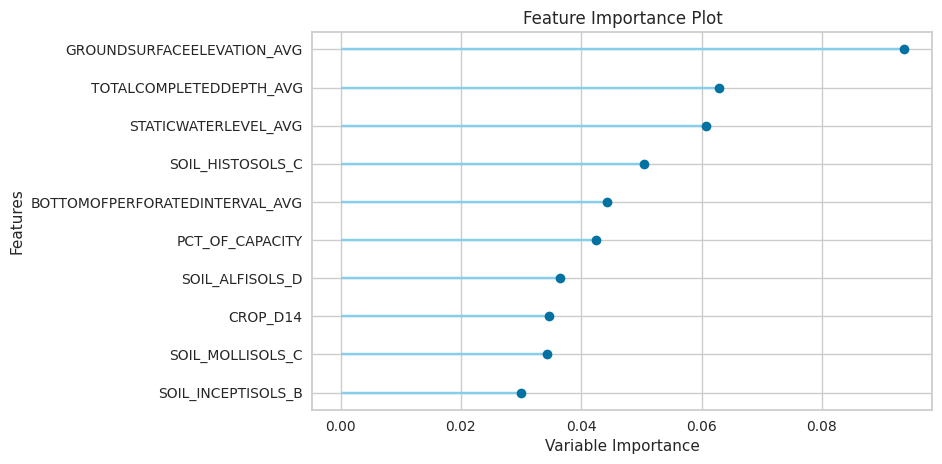

In [ ]:
plot_model(best, plot='feature')

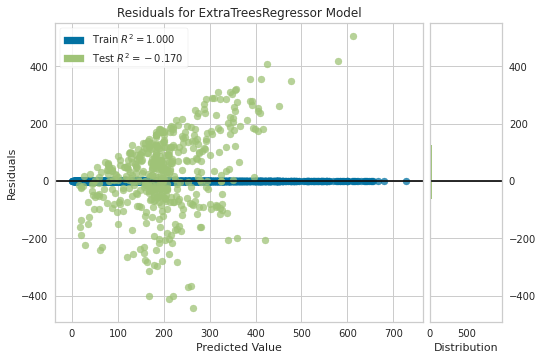

In [ ]:
plot_model(best, plot='residuals') 

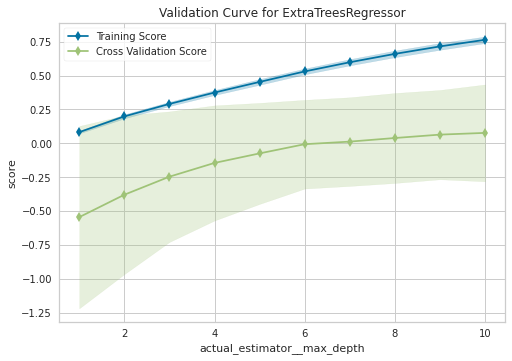

In [ ]:
plot_model(best, plot='vc') 

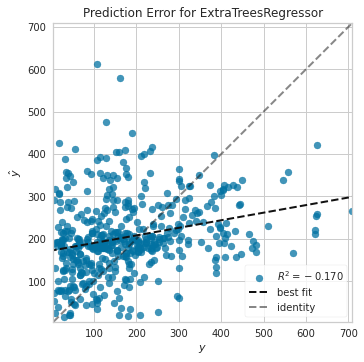

In [ ]:
plot_model(best, plot='error') 

In [ ]:
model_name = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,45.7295,4084.9639,63.9137,-0.8335,1.0503,2.3446
1,28.9203,1383.1845,37.1912,0.5906,0.5546,0.6597
2,37.2004,2167.5592,46.5571,0.3989,0.8267,1.4633
3,97.9519,22576.9414,150.2563,0.0432,0.9572,0.9038
4,70.0809,8215.5752,90.6398,0.3787,1.0046,3.5092
5,67.9977,13424.2184,115.8629,0.2700,0.6081,0.5670
6,52.3749,7412.7068,86.0971,0.5435,0.3940,0.3068
7,71.7532,8964.3045,94.6800,-0.1050,0.4815,0.3902
8,125.1126,27960.4275,167.2137,0.0041,0.7289,0.7467


In [ ]:
tuned_model_name = tune_model(model_name)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,52.1252,3786.0595,61.5310,-0.6993,1.1641,2.7178
1,36.3713,1923.1941,43.8542,0.4307,0.7574,1.2309
2,47.4433,3216.6472,56.7155,0.1080,0.9467,1.8302
3,115.2447,25996.9804,161.2358,-0.1017,0.9794,1.1897
4,75.6913,9701.5088,98.4962,0.2664,0.9569,2.7852
5,87.8344,15763.0517,125.5510,0.1428,0.6975,0.7529
6,77.7787,13442.0065,115.9397,0.1723,0.5666,0.4759
7,79.0764,10069.0930,100.3449,-0.2412,0.4814,0.3545
8,145.8502,35744.5546,189.0623,-0.2731,0.8344,0.8750


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


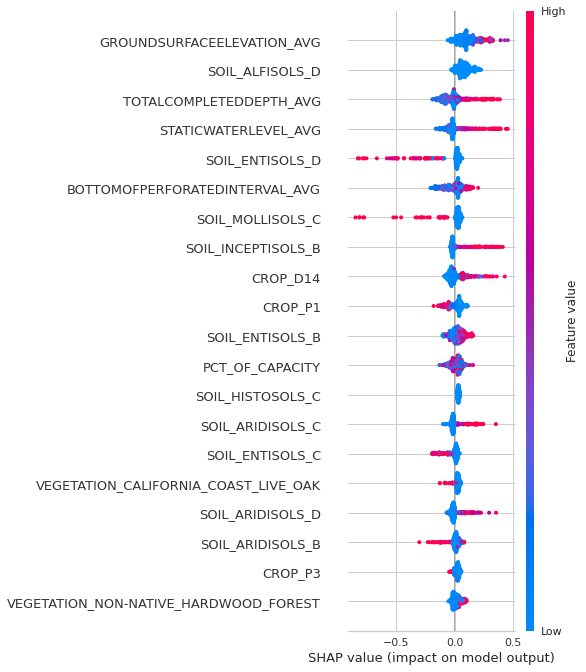

In [ ]:
#Since the tuned model is not as good as the best, going with the best
interpret_model(best)

### Improve above model with feature interactions

In [ ]:
# We already have an imputed and scaled train and test, we do not want to preprocess
#https://pycaret.gitbook.io/docs/get-started/preprocessing/feature-engineering
feature_interaction_exp = setup(
    train_data,
    target="GSE_GWE",
    preprocess=False,
    #Transform the target
    transform_target= True,
    train_size=1.0,
    test_data=test_data,
    remove_multicollinearity = True,
    multicollinearity_threshold=0.001,
    remove_perfect_collinearity= True,
    #Low Variance in feature
    ignore_low_variance=True,
    session_id=RANDOM_SEED,
    polynomial_features = True,
    polynomial_degree = 3,
    polynomial_threshold = 0.05,
    log_experiment=True,
    experiment_name="water_depth_feature_engg_5",
)

,Description,Value
0,session_id,42
1,Target,GSE_GWE
2,Original Data,"(3346, 80)"
3,Missing Values,False
4,Numeric Features,79
5,Categorical Features,0
6,Transformed Train Set,"(3346, 79)"
7,Transformed Test Set,"(478, 79)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,False


2022/07/04 15:26:59 INFO mlflow.tracking.fluent: Experiment with name 'water_depth_feature_engg_5' does not exist. Creating a new experiment.


In [ ]:
feature_engg_best = compare_models(['et', 'knn', 'lightgbm', 'xgboost', 'rf', 'gbr'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,67.5045,10850.3303,96.3378,0.1173,0.7355,1.1668,4.4970
knn,K Neighbors Regressor,71.7248,11571.7238,101.5740,0.0165,0.7769,1.1707,0.1950
lightgbm,Light Gradient Boosting Machine,70.9867,12083.3810,102.9223,-0.0044,0.7489,1.3617,0.6510
gbr,Gradient Boosting Regressor,74.6296,12478.4339,103.9782,-0.0141,0.7662,1.3041,2.1740
rf,Random Forest Regressor,71.4509,11687.9602,102.0104,-0.0549,0.7679,1.2489,6.6330
xgboost,Extreme Gradient Boosting,76.7390,13168.7916,107.7094,-0.1504,0.7936,1.3719,2.4140


### Group Features

In [ ]:
# We already have an imputed and scaled train and test, we do not want to preprocess
#https://pycaret.gitbook.io/docs/get-started/preprocessing/feature-engineering
group_feature_exp = setup(
    train_data,
    target="GSE_GWE",
    preprocess=False,
    #Transform the target
    transform_target= True,
    remove_multicollinearity = True,
    
    multicollinearity_threshold=0.05,
    #Low Variance in feature
    ignore_low_variance=True,
    train_size=1.0,
    test_data=test_data,
    session_id=RANDOM_SEED,
    group_features = ['TOTALCOMPLETEDDEPTH_AVG', 'TOTALDRILLDEPTH_AVG',
                         'BOTTOMOFPERFORATEDINTERVAL_AVG', 'TOPOFPERFORATEDINTERVAL_AVG',
                         'STATICWATERLEVEL_AVG'],
                   
    log_experiment=True,
    experiment_name="water_depth_group_features_1",
)

,Description,Value
0,session_id,42
1,Target,GSE_GWE
2,Original Data,"(3346, 80)"
3,Missing Values,False
4,Numeric Features,79
5,Categorical Features,0
6,Transformed Train Set,"(3346, 79)"
7,Transformed Test Set,"(478, 79)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,False


2022/07/04 02:58:16 INFO mlflow.tracking.fluent: Experiment with name 'water_depth_group_features_1' does not exist. Creating a new experiment.


In [ ]:
group_feature_best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,67.5045,10850.3303,96.3378,0.1173,0.7355,1.1668,3.2680
catboost,CatBoost Regressor,67.4060,10753.7434,96.8806,0.0991,0.7108,1.1594,16.5960
knn,K Neighbors Regressor,71.7248,11571.7238,101.5740,0.0165,0.7769,1.1707,0.4170
lightgbm,Light Gradient Boosting Machine,70.9867,12083.3810,102.9223,-0.0044,0.7489,1.3617,0.4320
gbr,Gradient Boosting Regressor,74.6296,12478.4339,103.9782,-0.0141,0.7662,1.3041,1.7530
rf,Random Forest Regressor,71.4509,11687.9602,102.0104,-0.0549,0.7679,1.2489,5.1020
ada,AdaBoost Regressor,83.7396,13767.6181,109.5120,-0.1172,0.8169,1.3349,0.4140
xgboost,Extreme Gradient Boosting,76.7390,13168.7916,107.7094,-0.1504,0.7936,1.3719,1.4180
lasso,Lasso Regression,101.8036,18554.2255,130.4438,-0.7687,0.9795,1.8308,0.2840
en,Elastic Net,101.8036,18554.2255,130.4438,-0.7687,0.9795,1.8308,0.0240


#### Ignore features by selecting only those indicated as important in the last training

In [ ]:
ignore_cols_list = [col for col in train_data.columns if col not in 
                        ('GROUNDSURFACEELEVATION_AVG'
                        ,'TOTALCOMPLETEDDEPTH_AVG'
                        ,'STATICWATERLEVEL_AVG'
                        ,'SOIL_HISTOSOLS_C'
                        ,'BOTTOMOFPERFORATEDINTERVAL_AVG'
                        ,'PCT_OF_CAPACITY'
                        ,'SOIL_ALFISOLS_D'
                        ,'CROP_D14'
                        # ,'CROP_P1'
                        # ,'CROP_P3'
                        # ,'CROP_D12'
                        # ,'SOIL_MOLLISOLS_C'
                        # ,'SOIL_INCEPTISOLS_B'
                        # ,'VEGETATION_CALIFORNIA_COAST_LIVE_OAK'
                        # ,'SOIL_ENTISOLS_B'
                        # ,'SOIL_ENTISOLS_C'
                        # ,'SOIL_ENTISOLS_D'
                        # ,'SOIL_ARIDISOLS_C'
                        # ,'VEGETATION_NON-NATIVE_HARDWOOD_FOREST'
                        , 'POPULATION_DENSITY'
                        , 'GSE_GWE')
]

In [ ]:
# We already have an imputed and scaled train and test, we do not want to preprocess
chosen_cols_target_normalized_exp = setup(
    train_data,
    target="GSE_GWE",
    preprocess=False,
    #Transform the target
    transform_target= True,
    remove_multicollinearity = True,
    multicollinearity_threshold=0.1,
    #Low Variance in feature
    ignore_low_variance=True,
    train_size=1.0,
    test_data=test_data,
    session_id=RANDOM_SEED,
    log_experiment=True,
    ignore_features=ignore_cols_list,
    experiment_name="water_depth_chosen_cols",
)

,Description,Value
0,session_id,42
1,Target,GSE_GWE
2,Original Data,"(3346, 80)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,0
6,Transformed Train Set,"(3346, 9)"
7,Transformed Test Set,"(478, 9)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,False


In [ ]:
selected_cols_best = compare_models(['et', 'knn', 'lightgbm', 'xgboost', 'ada', 'rf', 'gbr'], fold=51)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,57.1266,8227.0465,79.8602,0.1450,0.5932,0.7854,0.1937
gbr,Gradient Boosting Regressor,61.3103,8673.6284,82.3248,0.1215,0.6194,0.8858,0.6116
et,Extra Trees Regressor,55.0342,8636.9503,80.1209,0.0940,0.5617,0.7417,0.9469
rf,Random Forest Regressor,58.1632,9006.3207,82.7840,0.0152,0.5996,0.8051,1.6431
xgboost,Extreme Gradient Boosting,58.3168,8583.7201,81.9874,-0.0151,0.6077,0.7888,0.7459
ada,AdaBoost Regressor,75.2029,11460.1046,94.5694,-0.0863,0.7178,1.0540,0.1488
knn,K Neighbors Regressor,69.7259,12959.3695,101.3648,-0.5839,0.7135,1.0367,0.0371


## Voting Ensemble

In [ ]:
lightgbm= create_model('lightgbm', verbose=False)
gbr= create_model('gbr', verbose=False)

blender= blend_models([lightgbm, gbr])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,30.7396,2209.5461,47.0058,0.0083,0.6848,0.8787
1,36.7618,2420.4670,49.1982,0.2835,0.6936,1.0020
2,40.3809,3478.0399,58.9749,0.0355,0.7779,1.2971
3,85.3317,12329.6124,111.0388,0.4775,0.7733,1.1061
4,67.4363,7838.9666,88.5379,0.4072,0.9300,2.7052
5,63.4702,11836.3321,108.7949,0.3563,0.5053,0.3840
6,63.0395,11911.0066,109.1376,0.2666,0.5489,0.3898
7,71.3128,9059.3182,95.1805,-0.1167,0.4984,0.4151
8,123.4253,27079.5293,164.5586,0.0355,0.7289,0.7448


## Analyze Model

In [ ]:
%matplotlib inline
eb = evaluate_model(best)

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


### PyCaret experiments without target normalization

In [ ]:
from pycaret.regression import *

# We already have an imputed and scaled train and test, we do not want to preprocess
#transform the target=https://pycaret.gitbook.io/docs/get-started/preprocessing/scale-and-transform#target-transform
water_depth_exp = setup(
    train_data,
    target="GSE_GWE",
    train_size=1.0,
    test_data=test_data,
    preprocess=False,
    session_id=RANDOM_SEED,
    log_experiment=True,
    experiment_name="water_depth_target",
)


,Description,Value
0,session_id,42
1,Target,GSE_GWE
2,Original Data,"(3346, 80)"
3,Missing Values,False
4,Numeric Features,79
5,Categorical Features,0
6,Transformed Train Set,"(3346, 79)"
7,Transformed Test Set,"(478, 79)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,False


2022/06/30 18:22:06 INFO mlflow.tracking.fluent: Experiment with name 'water_depth_target' does not exist. Creating a new experiment.


In [ ]:
%matplotlib inline
plain_best = compare_models()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4561.0742,994420397.8830,31534.4319,-106823269.6155,1.5345,696.2568
1,2.2407,9.7960,3.1299,0.1018,0.3566,0.3740
2,2.6996,11.1953,3.3459,-0.0222,0.4547,0.4537
3,4.6508,39.8313,6.3112,-0.1766,0.5193,0.3905
4,3.7553,23.2423,4.8210,-0.0487,0.4669,0.6032
5,3.6276,21.1445,4.5983,0.0907,0.3687,0.3548
6,2.2266,8.3553,2.8906,0.5790,0.2224,0.1774
7,3.5323,20.8376,4.5648,-1.1010,0.3516,0.2441
8,5.1428,38.5666,6.2102,-0.3325,0.5029,0.4275


In [ ]:
xgboost = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.8266,13.9542,3.7355,-0.4990,0.4709,0.6307
1,1.5459,3.7430,1.9347,0.6568,0.2409,0.2354
2,2.2277,8.0891,2.8441,0.2614,0.3600,0.4088
3,3.6400,27.6297,5.2564,0.1838,0.4374,0.3546
4,3.1718,19.1342,4.3743,0.1367,0.4637,0.6212
5,2.5687,14.0814,3.7525,0.3945,0.2773,0.2322
6,1.9054,7.2903,2.7001,0.6326,0.1905,0.1555
7,2.3681,9.6137,3.1006,0.0307,0.2096,0.1759
8,3.9561,23.0842,4.8046,0.2024,0.3224,0.3106


In [ ]:
tuned_xgboost  = tune_model(xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3763,16.6646,4.0822,-0.7902,0.5254,0.7542
1,2.0928,7.3567,2.7123,0.3255,0.3454,0.3798
2,2.9579,14.2950,3.7809,-0.3053,0.4508,0.5675
3,4.3856,28.8815,5.3741,0.1469,0.4372,0.4575
4,3.2787,17.3195,4.1617,0.2186,0.4454,0.5785
5,3.2541,17.0241,4.1260,0.2679,0.3194,0.3133
6,2.5920,12.1354,3.4836,0.3885,0.2518,0.2132
7,2.5331,9.6646,3.1088,0.0255,0.2080,0.1737
8,4.7567,31.8954,5.6476,-0.1020,0.3768,0.3672


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


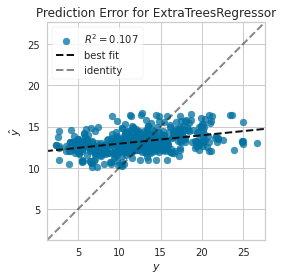

In [ ]:
plot_model(tuned_xgboost, plot = 'error')
# With clustering and sqrt normalizations r2 = 0.107

In [ ]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.3203,10.6056,3.2566,-0.1393,0.3927,0.4724
1,2.0495,7.0807,2.6610,0.3508,0.3234,0.3232
2,1.9698,7.0209,2.6497,0.3589,0.3284,0.3517
3,3.4266,22.3838,4.7312,0.3388,0.3762,0.3282
4,3.5342,24.3345,4.9330,-0.0980,0.4972,0.6874
5,2.2967,10.7511,3.2789,0.5377,0.2405,0.2027
6,1.7160,6.2027,2.4905,0.6874,0.1653,0.1295
7,2.6375,11.6965,3.4200,-0.1793,0.2352,0.1933
8,4.0773,26.6147,5.1589,0.0804,0.3415,0.3174


In [ ]:
tuned_catboost  = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0421,14.4186,3.7972,-0.5489,0.4812,0.6565
1,2.1976,7.9289,2.8158,0.2730,0.3376,0.3544
2,2.1576,8.3378,2.8875,0.2387,0.3538,0.3842
3,3.9942,26.2151,5.1201,0.2256,0.4050,0.3967
4,3.4019,21.5104,4.6379,0.0295,0.4865,0.6669
5,2.9389,14.3065,3.7824,0.3848,0.2966,0.2893
6,2.3465,10.6523,3.2638,0.4632,0.2348,0.1948
7,2.2728,9.0688,3.0114,0.0856,0.2054,0.1714
8,4.7276,31.2363,5.5889,-0.0792,0.3800,0.3896


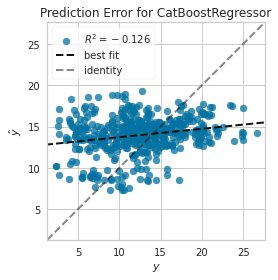

In [ ]:
plot_model(tuned_catboost, plot = 'error')

## Pycaret model search with clustering alone

In [ ]:

train_cluster_data = pd.concat([X_train_cluster_df, y_train], axis=1)
test_cluster_data = pd.concat([X_test_cluster_df, y_test], axis=1)

In [ ]:
from pycaret.regression import *
#We already have an imputed and scaled train and test, we do not want to preprocess
water_depth_cluster_exp = setup(train_cluster_data
                        , target='GSE_GWE',
                        train_size=1.0,
                        test_data= test_cluster_data,
                        preprocess=False, session_id=RANDOM_SEED,
                       log_experiment=True, experiment_name="water_depth_cluster_sqrt")

,Description,Value
0,session_id,42
1,Target,GSE_GWE
2,Original Data,"(3346, 81)"
3,Missing Values,False
4,Numeric Features,80
5,Categorical Features,0
6,Transformed Train Set,"(3346, 80)"
7,Transformed Test Set,"(478, 80)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,False


2022/06/19 19:35:02 INFO mlflow.tracking.fluent: Experiment with name 'water_depth_cluster_1' does not exist. Creating a new experiment.


In [ ]:
%matplotlib inline
#creating a model
lr = create_model('lr')



,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,117521.6595,660313827836.1814,812596.9652,-296371606.4055,2.0338,2782.7835
1,49.7033,5636.2169,75.0747,-0.6683,1.0528,1.8735
2,60.6874,5771.3455,75.9694,-0.6004,1.0184,1.6116
3,118.3915,27897.6179,167.0258,-0.1822,1.3791,1.0267
4,96.3616,14601.9060,120.8383,-0.1042,1.1356,4.8862
5,98.4457,17092.4879,130.7382,0.0705,0.8372,1.0898
6,59.5593,6668.4874,81.6608,0.5894,0.7040,0.4035
7,93.7084,14392.1223,119.9672,-0.7740,0.9762,0.4955
8,150.7039,34352.9646,185.3455,-0.2236,0.8912,1.1502


In [ ]:
compare_models() #Time taken > 17m

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,69.7223,10484.3109,96.0398,0.0746,0.7781,1.5207,4.1300
catboost,CatBoost Regressor,70.9224,11039.9908,99.2784,-0.0234,0.7702,1.5307,24.7910
knn,K Neighbors Regressor,72.3932,11593.2802,102.4067,-0.0258,0.7834,1.3373,0.2100
lightgbm,Light Gradient Boosting Machine,72.2066,12071.8128,103.9338,-0.0831,0.7837,1.6282,0.9020
rf,Random Forest Regressor,73.2270,12109.3941,104.5205,-0.1001,0.7888,1.6185,6.8550
gbr,Gradient Boosting Regressor,76.1096,12004.5654,104.4788,-0.1496,0.8053,1.6578,2.7400
xgboost,Extreme Gradient Boosting,75.6711,12580.2174,105.4749,-0.1697,0.7990,1.5544,2.9430
par,Passive Aggressive Regressor,82.6917,14192.3800,111.3021,-0.1929,0.8594,1.3595,0.0980
huber,Huber Regressor,82.2711,14648.4768,112.7254,-0.2440,0.8933,1.4190,0.2120
ridge,Ridge Regression,85.2479,14124.6868,112.2101,-0.2538,0.9030,1.6377,0.0320


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

In [ ]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,52.8939,5001.3458,70.7202,-1.2448,1.1751,3.0442
1,30.7736,1573.3535,39.6655,0.5343,0.6821,1.1025
2,43.9926,2870.7455,53.5793,0.2039,0.8703,1.6871
3,94.1808,19251.4637,138.7496,0.1842,0.9652,1.1274
4,81.6478,12129.7407,110.1351,0.0828,1.1078,4.9459
5,70.4018,12583.2866,112.1752,0.3157,0.6488,0.7382
6,52.1317,6113.6455,78.1898,0.6235,0.4246,0.3830
7,69.4657,8826.0057,93.9468,-0.0879,0.4521,0.4159
8,125.6503,26245.9812,162.0061,0.0652,0.7508,0.8789


In [ ]:
tuned_et  = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,63.1174,5563.2368,74.5871,-1.4970,1.3084,3.7380
1,40.7350,2522.7796,50.2273,0.2533,0.8235,1.3598
2,57.1878,4459.1094,66.7766,-0.2365,1.0203,2.1332
3,110.4627,22292.7618,149.3076,0.0553,0.9754,1.4477
4,80.2089,9761.7126,98.8014,0.2618,1.0313,3.6987
5,88.4695,15779.9712,125.6184,0.1419,0.7241,0.8260
6,82.2057,14105.3879,118.7661,0.1314,0.5858,0.5100
7,71.8424,8924.4392,94.4692,-0.1001,0.4530,0.3257
8,144.9801,33482.7577,182.9829,-0.1926,0.8467,0.9799


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


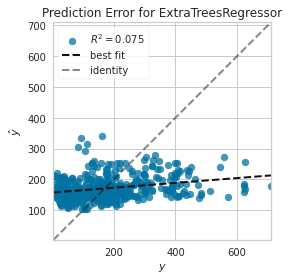

In [ ]:
plot_model(tuned_et, plot = 'error')

## Creating PyCaret experiment for data without cluster label

In [ ]:
train_data = pd.concat([X_train_impute_df, y_train_sqrt], axis=1)
test_data = pd.concat([X_test_impute_df, y_test_sqrt], axis=1)


In [ ]:
from pycaret.regression import *

# We already have an imputed and scaled train and test, we do not want to preprocess
water_depth_normalized_exp = setup(
    train_data,
    target="GSE_GWE",
    train_size=1.0,
    test_data=test_data,
    preprocess=False,
    session_id=RANDOM_SEED,
    log_experiment=True,
    experiment_name="water_depth_normalized",
)


,Description,Value
0,session_id,42
1,Target,GSE_GWE
2,Original Data,"(3346, 80)"
3,Missing Values,False
4,Numeric Features,79
5,Categorical Features,0
6,Transformed Train Set,"(3346, 79)"
7,Transformed Test Set,"(478, 79)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,False


In [ ]:
%matplotlib inline
#creating a model
lr = create_model('lr')



,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.8061,12.5644,3.5446,-0.3497,0.4064,0.5169
1,2.2228,9.5528,3.0908,0.1241,0.3526,0.3700
2,2.7208,11.4746,3.3874,-0.0477,0.4571,0.4594
3,4.6904,40.4606,6.3609,-0.1952,0.5258,0.3944
4,3.7690,23.4119,4.8386,-0.0563,0.4676,0.5972
5,3.6682,21.3679,4.6225,0.0811,0.3693,0.3603
6,2.2195,8.3225,2.8849,0.5806,0.2198,0.1770
7,3.5460,20.7999,4.5607,-1.0972,0.3504,0.2447
8,5.0619,37.6665,6.1373,-0.3014,0.5019,0.4232


In [ ]:
compare_models() #Time taken > 17m

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,2.7132,14.4300,3.6775,0.1960,0.3239,0.3323,19.6000
et,Extra Trees Regressor,2.7354,14.6185,3.6898,0.1834,0.3325,0.3435,3.3320
knn,K Neighbors Regressor,2.9189,16.4794,3.9693,0.0834,0.3520,0.3435,0.1340
rf,Random Forest Regressor,2.8537,15.7693,3.8818,0.0827,0.3414,0.3463,5.7220
lightgbm,Light Gradient Boosting Machine,2.8506,16.5165,3.9327,0.0711,0.3416,0.3490,0.5740
gbr,Gradient Boosting Regressor,2.9788,16.6117,3.9657,0.0645,0.3495,0.3658,1.6810
xgboost,Extreme Gradient Boosting,2.9394,16.7975,3.9805,0.0353,0.3559,0.3599,1.7970
ada,AdaBoost Regressor,3.4133,18.6216,4.2111,-0.0462,0.3774,0.4249,0.5290
ridge,Ridge Regression,3.3423,20.0275,4.3254,-0.1025,0.3807,0.3839,0.0200
br,Bayesian Ridge,3.3806,20.7990,4.4047,-0.1549,0.3936,0.3817,0.0480


In [ ]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.3245,10.6211,3.2590,-0.1409,0.3913,0.4716
1,1.8639,6.2618,2.5024,0.4259,0.3096,0.3050
2,2.0687,7.6844,2.7721,0.2983,0.3366,0.3629
3,3.4789,22.7497,4.7697,0.3280,0.3820,0.3354
4,3.6655,25.5265,5.0524,-0.1517,0.5053,0.7088
5,2.3117,10.9056,3.3024,0.5310,0.2417,0.2012
6,1.7594,6.9580,2.6378,0.6494,0.1756,0.1320
7,2.5672,11.2501,3.3541,-0.1343,0.2284,0.1899
8,4.1028,26.6035,5.1579,0.0808,0.3433,0.3182


In [ ]:
tuned_catboost  = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,65.8685,5821.9516,76.3017,-1.6131,1.3439,3.8286
1,41.1770,2422.3424,49.2173,0.2830,0.8510,1.4975
2,58.2190,4772.3281,69.0820,-0.3234,1.0675,2.2995
3,120.0881,25542.1140,159.8190,-0.0824,1.0346,1.5344
4,81.4949,11210.6813,105.8805,0.1522,1.0396,3.4871
5,88.3400,15814.7677,125.7568,0.1400,0.7301,0.8500
6,80.1744,13682.3834,116.9717,0.1575,0.5901,0.5309
7,78.5067,9748.8373,98.7362,-0.2017,0.4742,0.3573
8,148.1815,35467.8366,188.3291,-0.2633,0.8458,0.9400


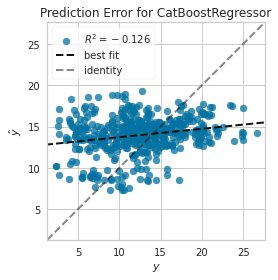

In [ ]:
plot_model(tuned_catboost, plot = 'error')

## Drop features?


In [ ]:
[col for col in X_train_impute_df if not (col.startswith('SOIL') or col.startswith('VEGETATION') or col.startswith('CROP'))]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b042e2da-6536-449d-95b8-d85fa08825de' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>